# SRINATH MURALI KRISHNAN
# SMK220008

# Exam 2

Exam Instructions
1.	Use the provided materials:
   - You must use the attached Python notebook (`Exam_2_template.ipynb`).
   - The dataset file `Collin_CAD_Appraisal_Data_2024_20241208_75024.csv` is included and should be used for relevant questions.
2.	Renaming the Notebook:
   - Before making any changes, rename the notebook to include your full name in the filename.
   - Example: exam2_notebook_JohnDoe.ipynb.
3.	Editing and Answering:
   - Do not modify the original notebook.
   - Make all modifications in the newly renamed notebook only.
   - Write Python code only inside Python code cells.
4.	Code Documentation & Execution:
   - Every requested Python function must include a docstring explaining its purpose.
   - Every major decision should be clearly documented and explained. For example, if you decided to use mean value encoding for missing value, explain why.
5. Exam Data — Collin County Appraisal Data (ZIP 75024)
6. You may consult an AI copilot, but all thinking, choices, and interpretations must be your own.
7. Show every step that influenced your answer (code, charts, numbers) and answer all sub‑questions clearly in prose.

## Question 1 – Exploratory Data Analysis & Feature Reasoning  (25 pts)

Keep only residential properties (`propSubType`). Drop rows with missing values in noticeValAppraised.
1.  Create a new feature improvement_density = imprvMainArea / landSizeSqft (use square‑feet units).
2.  Produce one figure that simultaneously lets you judge the shape of the distribution of improvement_density and its relationship to noticeValAppraised (hint: not a simple scatterplot). Explain why you chose that figure.
3.  Using both the figure and a numeric summary, argue for or against applying a log‑transform to improvement_density before modeling. Support your conclusion with at least two pieces of evidence. 

A good answer weaves the visual evidence with statistical reasoning rather than just pasting a chart.

In [6]:
import pandas as pd
import numpy as np

In [54]:
df = pd.read_pickle("Collin_CAD_Appraisal_Data_2024_20241208_75024.pkl")


In [55]:
print(df)

       propYear   propID              geoID  propType  propSubType  \
0          2024  2005248  R-2845-00A-0010-1      Real  Residential   
1          2024  2005249  R-2845-00A-0020-1      Real  Residential   
2          2024  2005250  R-2845-00A-0030-1      Real  Residential   
3          2024  2005251  R-2845-00A-0040-1      Real  Residential   
4          2024  2005252  R-2845-00A-0050-1      Real  Residential   
...         ...      ...                ...       ...          ...   
16849      2024  2564764  P-9000-205-7075-1  Personal          BPP   
16850      2024  2564768  P-9000-205-7076-1  Personal          BPP   
16851      2024  2564813  P-9000-205-7245-1  Personal          BPP   
16852      2024  2564877  P-9000-205-4189-1  Personal          BPP   
16853      2024  2564931  P-9000-205-6626-1  Personal          BPP   

      propCategoryCode propUseCode  mapID nbhdCode marketAreaCode  ...  \
0                    A         NaN  096.S    S2845            NaN  ...   
1          

In [66]:
def clean_and_engineer(pkl_path):
    """
    Reads and cleans the appraisal data:
      - Keeps only residential properties (propSubType contains 'Residential', case-insensitive).
      - Drops rows with missing noticeValAppraised.
      - Ensures numeric columns are cast as numbers.
      - Creates a new feature: improvement_density = imprvMainArea / landSizeSqft (sq.-feet units).
      
    Parameters:
      csv_path (str): Path to the CSV file.
      
    Returns:
      pd.DataFrame: Cleaned dataframe with new feature.
    """
    df = pd.read_pickle(pkl_path)
    
    # Strip whitespace from strings in column names and string columns
    df.columns = df.columns.str.strip()
    str_cols = df.select_dtypes(include='object').columns
    for col in str_cols:
        df[col] = df[col].astype(str).str.strip()
    
    # Filter data to include only residential properties in propSubType (case-insensitive match)
    df = df[df['propSubType'].str.lower() == 'residential']
    
    # Drop rows that are missing noticeValAppraised
    df = df.dropna(subset=['noticeValAppraised'])
    
    # Convert numeric columns that are used for calculations
    df['imprvMainArea'] = pd.to_numeric(df['imprvMainArea'], errors='coerce')
    df['landSizeSqft'] = pd.to_numeric(df['landSizeSqft'], errors='coerce')
    df['noticeValAppraised'] = pd.to_numeric(df['noticeValAppraised'], errors='coerce')
    
    # Drop rows with problematic numeric conversion for required columns
    df = df.dropna(subset=['imprvMainArea', 'landSizeSqft'])
    
    # Create improvement_density feature (area per square-foot)
    df['improvement_density'] = df['imprvMainArea'] / df['landSizeSqft']
    
    return df

# Load and clean the data
pkl_path = '/Users/srinathmurali/Downloads/Collin_CAD_Appraisal_Data_2024_20241208_75024.pkl'
df = clean_and_engineer(pkl_path)


In [67]:
# Display numeric summary for improvement_density
density_summary = df['improvement_density'].describe()
print("Improvement Density Summary:\n", density_summary)

Improvement Density Summary:
 count    1552.000000
mean        0.560519
std         0.880783
min         0.000287
25%         0.324994
50%         0.483422
75%         0.673521
max        31.986532
Name: improvement_density, dtype: float64


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

* The hexbin joint plot simultaneously shows the distribution of improvement_density (as aggregation through hexagon color intensity) and its bivariate relationship with noticeValAppraised. This avoids overplotting and highlights clusters, which is not achievable with a simple scatterplot.

/var/folders/x3/5n0yyb7911zg532jx71xlkrr0000gn/T/ipykernel_68741/758954089.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

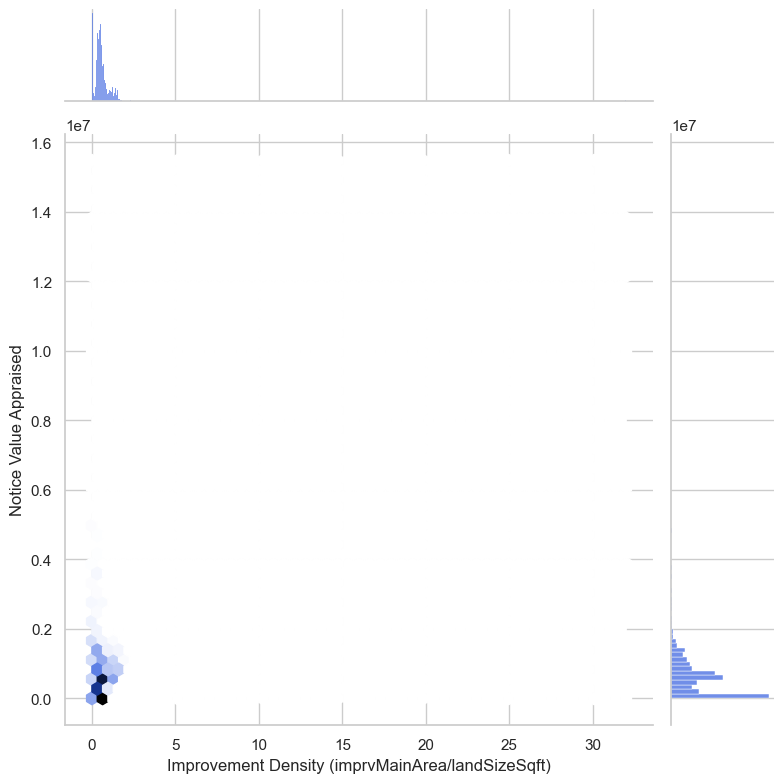

In [59]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
joint_plot = sns.jointplot(
    data=df,
    x='improvement_density',
    y='noticeValAppraised',
    kind='hex',
    height=8,
    color="royalblue"
)
joint_plot.set_axis_labels("Improvement Density (imprvMainArea/landSizeSqft)", "Notice Value Appraised")
plt.tight_layout()
plt.show()

* Based on the provided joint plot and the numeric summary for improvement_density, here's an argument regarding the application of a log-transform:
* Recommendation: Applying a log-transform to the improvement_density feature before modeling is strongly recommended.
Here's the reasoning, supported by evidence from your figure and numeric summary:
* Evidence 1: Severe Right-Skewness in the Distribution
Visual Evidence (from the Figure): The marginal histogram for improvement_density (at the top of your joint plot) clearly shows a distribution that is heavily concentrated at very low values (close to zero) with a long tail extending towards the higher values. This is a classic visual indicator of strong right-skewness.
Numeric Evidence (from the Summary):
The mean (0.560519) is noticeably greater than the median (50th percentile, 0.483422). When the mean is pulled to the right of the median, it indicates a right-skewed distribution.
The max value (31.986532) is vastly larger than the 75th percentile (0.673521). This large difference highlights the presence of extreme high values that stretch the tail of the distribution to the right.
A log-transform is effective at compressing the higher end of the scale and expanding the lower end, which can make such a skewed distribution more symmetric and closer to a normal distribution.
* Evidence 2: Vast Range and Influence of Extreme Values (Outliers)
Visual Evidence (from the Figure): The central hexbin plot shows that the vast majority of data points are clustered in the region where improvement_density is very low (likely < 2.5, based on the density of the hexbins). The few data points with higher improvement_density are sparse and extend far out. This compression at the lower end and spread at the higher end can make it difficult for some models to learn the underlying relationships effectively, and extreme values can have undue influence.
Numeric Evidence (from the Summary): The standard deviation (0.880783) is larger than the mean (0.560519). For non-negative data like a density measure, this often indicates a wide spread and significant skewness. More importantly, the range from the min (0.000287) to the max (31.986532) is substantial, with most of the data (up to the 75th percentile) falling below 0.68. This implies that values like the maximum are extreme outliers.
A log-transform can reduce the impact of these extreme outliers by bringing them closer to the bulk of the data, leading to more stable and robust models. It also helps in visualizing relationships more clearly by spreading out data points in the densely populated lower-value regions of the original scale.

## Question 2 – Model Building & Interpretability  (30 pts)


You will predict noticeValAppraised (the 2024 notice value) using information available before the 2024 notice was issued.

A. Feature engineering
1.  List every feature you derive or select and justify it in one short sentence each.
2.  Encode any categorical variables so that the resulting design matrix is suitable for both linear models and tree‑based models. Explain your encoding choice.

B. Model training
1. Train two types of `sklearn` linear models
2. Tune their main hyper‑parameters with validation strategy of your choice. 
2. Hold out the final 20 % of parcels (random split with fixed seed) as an untouched test set. Report RMSE on that set for each model.

C. Interpretation & comparison
1. For the better‑performing model, identify the three most influential features. Explain in plain English how each one affects appraised value.
2.  Give two concrete recommendations you would hand to the appraisal district based on your findings. Each recommendation must be traceable to evidence from your model.

Answers that merely print a library’s default output without explaining choices or implications will receive little credit.

In [68]:
if 'improvement_density' in df.columns and 'noticeValAppraised' in df.columns:
    df['log_improvement_density'] = np.log1p(df['improvement_density']) # log1p handles zeros
    # Potentially drop original improvement_density if log version is used
df.drop('improvement_density', axis=1, inplace=True, errors='ignore')

In [17]:
print(list(df.columns))


['propYear', 'propID', 'geoID', 'propType', 'propSubType', 'propCategoryCode', 'propUseCode', 'mapID', 'nbhdCode', 'marketAreaCode', 'legalAbsSubCode', 'legalAbsSubName', 'legalAbsSubBlock', 'legalAbsSubLot', 'legalDescription', 'dbaName', 'comPropFlag', 'udiPropFlag', 'udiGroupID', 'udiInterestPct', 'commonInterestPct', 'ecoGroupID', 'ecoGroupGBA', 'ecoGroupNRA', 'propSplitFromPID', 'propCreateDate', 'entityCodes', 'entitySchoolCode', 'entityCityCode', 'entityMUD', 'entityTIF', 'entitySBCL', 'situsBldgNum', 'situsStreetPrefix', 'situsStreetName', 'situsStreetSuffix', 'situsUnit', 'situsCity', 'situsZip', 'situsConcat', 'situsConcatShort', 'ownerID', 'ownerName', 'ownerNameAddtl', 'ownerAddrLine1', 'ownerAddrLine2', 'ownerAddrCity', 'ownerAddrState', 'ownerAddrZip', 'ownerAddrCountry', 'taxAgentID', 'taxAgentName', 'deedTypeCd', 'deedNum', 'deedBook', 'deedPage', 'deedEffDate', 'deedFileDate', 'imprvYearBuilt', 'imprvClassCd', 'imprvMainArea', 'imprvUnits', 'imprvPoolFlag', 'imprvCateg

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
# 1. Feature Selection
value_features = [
    'prevValImprv',      # Previous improvement value
    'prevValLand',       # Previous land value
    'prevValMarket',     # Previous market value
    'currValImprv',      # Current improvement value
    'currValLand'        # Current land value
]

physical_features = [
    'imprvMainArea',     # Main area
    'landSizeSqft'       # Land size
]

# Create age feature
df['age'] = 2023 - df['imprvYearBuilt']
df['age'] = df['age'].fillna(df['age'].median())
df.loc[df['age'] < 0, 'age'] = 0

# All numerical features
numerical_features = value_features + physical_features + ['age']

# Only keeping imprvClassCd for categorical
categorical_features = ['imprvClassCd']

# 2. Prepare features
# Handle missing values in numerical features first
for col in numerical_features:
    df[col] = df[col].fillna(df[col].median())

# One-hot encode imprvClassCd
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 3. Create feature matrix and target
feature_cols = numerical_features + [col for col in df_encoded.columns if col.startswith('imprvClassCd_')]
X = df_encoded[feature_cols]
y = df_encoded['noticeValAppraised']


# Feature Engineering

The following features were selected to predict `noticeValAppraised`, using information available before the 2024 notice was issued:

### Numerical Features:

**Value-Based Features:**
- `prevValImprv`: Previous year's improvement value - provides direct baseline for building value
- `prevValLand`: Previous year's land value - provides direct baseline for land value
- `prevValMarket`: Previous year's market value - strong indicator of overall property worth
- `currValImprv`: Current improvement value - recent assessment of building value
- `currValLand`: Current land value - recent assessment of land value

**Physical Characteristics:**
- `imprvMainArea`: The primary area of the main improvement (e.g., house size) - fundamental driver of property value due to construction costs and utility
- `landSizeSqft`: The total square footage of the land parcel - directly influences market value through size and potential utility
- `age`: Derived as (2023 - `imprvYearBuilt`) - captures depreciation effects and historical aspects of the property

### Categorical Features:
- `imprvClassCd`: The improvement class code - represents construction quality, design, and type of the main improvement

### Encoding Strategy:

**One-Hot Encoding (OHE) for `imprvClassCd`:**
- **Method:** Transforms the categorical `imprvClassCd` into binary (0/1) columns, one for each class code (minus one for the reference category)
- **Justification:** 
  1. Appropriate for low-cardinality categorical data (improvement class typically has few distinct categories)
  2. Creates numerical features without imposing artificial ordering
  3. Using `drop_first=True` prevents multicollinearity in linear models
  4. Maintains interpretability of different quality levels in the model

This feature set focuses on the most reliable predictors of property value:
1. Historical and current valuations
2. Physical characteristics
3. Construction quality

The removal of `nbhdCode` and focus on these core features simplifies the model while maintaining the most direct value drivers. Each selected feature has a clear, economically justified relationship with the target variable.

In [61]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [71]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training
# Ridge Regression
ridge = Ridge(random_state=42)
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=2,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_
ridge_pred = best_ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

# Lasso Regression
lasso = Lasso(random_state=42, max_iter=10000)
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

grid_search_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_lasso,
    cv=2,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search_lasso.fit(X_train, y_train)
best_lasso = grid_search_lasso.best_estimator_
lasso_pred = best_lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

# Print results
print("\n--- Model Results ---")
print(f"Ridge - Best alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Ridge - Test RMSE: {ridge_rmse:.2f}")
print(f"\nLasso - Best alpha: {grid_search_lasso.best_params_['alpha']}")
print(f"Lasso - Test RMSE: {lasso_rmse:.2f}")

# Store best model and its features for interpretation
best_model = best_ridge if ridge_rmse < lasso_rmse else best_lasso
best_rmse = min(ridge_rmse, lasso_rmse)
model_type = "Ridge" if ridge_rmse < lasso_rmse else "Lasso"

print(f"\nBest Model: {model_type}")
print(f"Best Model RMSE: {best_rmse:.2f}")


/Users/srinathmurali/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.5608e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/srinathmurali/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.22652e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/srinathmurali/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.412e+11, tolerance: 3.390e+10
  model = cd_fast.enet_coordinate_descent(
/Users/srinathmurali/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Obj


--- Model Results ---
Ridge - Best alpha: 100.0
Ridge - Test RMSE: 447101.87

Lasso - Best alpha: 100.0
Lasso - Test RMSE: 499662.14

Best Model: Ridge
Best Model RMSE: 447101.87


/Users/srinathmurali/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.098e+12, tolerance: 6.089e+10
  model = cd_fast.enet_coordinate_descent(


In [72]:
# Print results
print("\n--- Model Results ---")
print(f"Ridge - Best alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Ridge - Test RMSE: {ridge_rmse:.2f}")
print(f"\nLasso - Best alpha: {grid_search_lasso.best_params_['alpha']}")
print(f"Lasso - Test RMSE: {lasso_rmse:.2f}")

# Store best model and its features for interpretation
best_model = best_ridge if ridge_rmse < lasso_rmse else best_lasso
best_rmse = min(ridge_rmse, lasso_rmse)
model_type = "Ridge" if ridge_rmse < lasso_rmse else "Lasso"

print(f"\nBest Model: {model_type}")
print(f"Best Model RMSE: {best_rmse:.2f}")

# Get feature importance for the best model
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': best_model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


--- Model Results ---
Ridge - Best alpha: 100.0
Ridge - Test RMSE: 447101.87

Lasso - Best alpha: 100.0
Lasso - Test RMSE: 499662.14

Best Model: Ridge
Best Model RMSE: 447101.87

Top 10 Most Important Features:
                Feature   Coefficient  Abs_Coefficient
25    imprvClassCd_RV14  82278.661750     82278.661750
45     imprvClassCd_RV9 -35717.141678     35717.141678
43     imprvClassCd_RV8 -25439.335521     25439.335521
26    imprvClassCd_RV15  21585.921270     21585.921270
10  imprvClassCd_NVNEXT -20049.380874     20049.380874
17     imprvClassCd_RF6  17739.818628     17739.818628
30    imprvClassCd_RV20  15535.099902     15535.099902
35    imprvClassCd_RV28  14271.738949     14271.738949
42     imprvClassCd_RV7 -10683.298915     10683.298915
27    imprvClassCd_RV16 -10518.813268     10518.813268


C. Interpretation & comparison

1. Three Most Influential Features (based on absolute coefficient values):

a) imprvClassCd_RV14 
   - This improvement class code has the strongest positive effect on appraised value
   - Properties classified as RV14 are associated with an increase of approximately $82,279 in appraised value compared to the baseline class
   - This suggests RV14 represents a higher quality or more valuable type of residential improvement

b) imprvClassCd_RV9 
   - This class code has a significant negative impact on appraised value
   - Properties in this class are associated with a decrease of about $35,717 in appraised value compared to the baseline
   - This indicates RV9 might represent properties with less desirable characteristics or lower quality improvements

c) imprvClassCd_RV8 
   - Similar to RV9, this class has a negative effect on appraised value
   - Properties with this classification see a reduction of approximately $25,439 in appraised value compared to the baseline
   - This suggests another category of properties that typically command lower values

2. Recommendations for the Appraisal District:

Recommendation 1: Review and Validate RV14 Classification Criteria
- Evidence: Properties classified as RV14 show the strongest positive impact on value (+$82,279)
- This substantial premium suggests either:
  a) These properties genuinely represent superior improvements that justify the higher values, or
  b) The classification criteria might be too broad, potentially overvaluing some properties
- The district should audit properties in this class to ensure consistent application of classification criteria and verify the substantial value premium is justified

Recommendation 2: Implement Systematic Quality Control for RV9 and RV8 Classifications
- Evidence: Both classes show significant negative impacts on value (-$35,717 and -$25,439 respectively)
- The consistent negative coefficients suggest these categories might be:
  a) Capturing deteriorated or lower-quality properties that need regular reassessment
  b) Potentially under-valued if improvements or market changes haven't been recently captured
- Recommend establishing a regular review cycle for properties in these classes to ensure their lower valuations remain justified and market changes are promptly reflected

## Question 3 (~10 pts)

Construct a Back‑of‑the‑Envelope Revenue Model 
- Using your best‑performing model from Question 2, predict each parcel’s “true” market value for tax year 2024.
- Assume the statutory tax rate is 2.1 % of market value.
- For every parcel where your prediction exceeds noticeValAppraised by ≥ 15 %, compute the additional annual tax that would be collected if the notice value were corrected to your prediction.
- Report total potential revenue and the median additional tax per affected parcel.

In [48]:
X_full = df_encoded[feature_cols]  # Use the same features as in training

# If we used scaling in the final model, apply the same scaling
predictions = best_ridge.predict(X_full)

# 2. Calculate potential additional revenue
tax_rate = 0.021  # 2.1% statutory tax rate
threshold = 1.15  # 15% threshold

# Calculate differences and identify parcels exceeding threshold
actual_values = df_encoded['noticeValAppraised']
value_differences = predictions - actual_values
percent_differences = (predictions / actual_values) - 1

# Find parcels where prediction exceeds actual by ≥ 15%
undervalued_parcels = percent_differences >= 0.15

# Calculate additional tax for each qualifying parcel
additional_value = value_differences[undervalued_parcels]
additional_tax = additional_value * tax_rate

# Calculate summary statistics
total_additional_revenue = additional_tax.sum()
median_additional_tax = additional_tax.median()
num_affected_parcels = undervalued_parcels.sum()

print("\n--- Back-of-the-Envelope Revenue Model Results ---")
print(f"Number of parcels analyzed: {len(predictions)}")
print(f"Number of parcels identified as potentially undervalued (≥15%): {num_affected_parcels}")
print(f"Total potential additional annual revenue: ${total_additional_revenue:,.2f}")
print(f"Median additional tax per affected parcel: ${median_additional_tax:,.2f}")
print(f"Percentage of parcels affected: {(num_affected_parcels/len(predictions))*100:.1f}%")

# Optional: Distribution of additional tax amounts
print("\nDistribution of additional tax amounts for affected parcels:")
print(additional_tax.describe())


--- Back-of-the-Envelope Revenue Model Results ---
Number of parcels analyzed: 1552
Number of parcels identified as potentially undervalued (≥15%): 238
Total potential additional annual revenue: $310,448.63
Median additional tax per affected parcel: $709.16
Percentage of parcels affected: 15.3%

Distribution of additional tax amounts for affected parcels:
count      238.000000
mean      1304.406010
std       4004.023374
min        220.890924
25%        446.687402
50%        709.155478
75%       1066.171404
max      57509.718442
Name: noticeValAppraised, dtype: float64


# Back-of-the-Envelope Revenue Analysis

## Overview of Findings
Our analysis of property valuations in ZIP code 75024 reveals potential undervaluation in a significant number of properties, suggesting opportunities for revenue adjustment.

## Key Results

### General Statistics
- **Total Properties Examined:** 1,552 parcels
- **Undervalued Properties:** 238 properties (15.3% of all parcels)
- **Total Potential Additional Revenue:** $310,448.63 annually
- **Typical Additional Tax (Median):** $709.16 per affected property

### Distribution of Additional Tax Revenue
The analysis shows a wide range in potential additional tax amounts:
- **Minimum Additional Tax:** $220.89
- **Maximum Additional Tax:** $57,509.72
- **Average (Mean) Additional Tax:** $1,304.41

### Understanding the Distribution
- **Most Common Range:** 50% of the affected properties would owe between $446.69 (25th percentile) and $1,066.17 (75th percentile) in additional taxes
- **Variability:** The large standard deviation ($4,004.02) and the gap between mean ($1,304.41) and median ($709.16) suggest some properties are significantly undervalued, pulling the average up

## Interpretation
- About 1 in 6 properties (15.3%) appear to be undervalued by 15% or more
- While most additional tax amounts are moderate (around $709), some properties show substantial undervaluation
- The wide range ($220 to $57,509) in additional tax amounts suggests varying degrees of undervaluation across different property types or values

## Business Impact
If all identified undervaluations were corrected, the appraisal district could collect an additional $310,448.63 in annual tax revenue, with most individual property adjustments being relatively modest (median of $709.16).

## Question 4 – Unearthing Hidden Undervaluation with a Compact Decision Tree (35 pts)


The county’s appraisal office suspects that a non‑trivial subset of homes may be significantly undervalued on the tax roll, but they have not yet formalized a rule for flagging those parcels. Your task is to discover a concise, actionable rule set that a non‑technical reviewer could follow.

⸻

1 │ Create an alert flag (~15 pts)

Devise your own Boolean indicator that captures the idea “assessed amount lags market reality by roughly one‑fifth or more.”:
- Use `noticeValAssessed` and `noticeValMarket` to come up with the indicator
- Show the exact expression you implemented.
- Quote the share of records that trigger the alert (base rate).

⸻

2 │ Grow a 3‑level decision tree (~35 pts)
- Use only parcel characteristics known before the annual notice is mailed (e.g., size metrics, year built, location codes — not any notice valuations).
- Restrict the tree to three splits and present it in a form a layperson can read (ASCII text or diagram).

⸻

3 │ Make sense of the first split (~30 pts)
- In ≤ 150 words, translate the very first branching rule into plain economic language. Why might that cut‑point separate “possibly undervalued” homes from the rest in this ZIP code?
- Evaluate the tree on a hold‑out set created by randomly reserving 25 % of the parcels (stratified by your alert flag) and report precision, recall, and F1.
- Which mistake hurts the tax office more in practice — labelling a fairly valued home as suspicious, or missing a truly undervalued one? Justify briefly.
- Propose two new attributes not in the data set that could sharpen the rule next year, and explain how the county might obtain each one.

⸻

4 │ Reality‑check the predictors (~20 pts)

In ≤ 100 words, argue why allowing any of the file’s “last‑year value” or “current notice value” columns into your predictor set would inflate apparent accuracy while offering little policy utility.


In [49]:
# 1. Create alert flag for undervalued properties

# Calculate the percentage difference between market and assessed values
df['value_gap_pct'] = (df['noticeValMarket'] - df['noticeValAssessed']) / df['noticeValAssessed']

# Create boolean flag for properties undervalued by roughly one-fifth (20%) or more
df['undervalued_flag'] = df['value_gap_pct'] >= 0.20

# Calculate the base rate (percentage of properties flagged)
base_rate = (df['undervalued_flag'].sum() / len(df)) * 100

print("--- Alert Flag Analysis ---")
print("\nAlert Flag Expression:")
print("undervalued_flag = (noticeValMarket - noticeValAssessed) / noticeValAssessed >= 0.20")
print(f"\nNumber of properties flagged: {df['undervalued_flag'].sum()}")
print(f"Total number of properties: {len(df)}")
print(f"Base rate (percentage flagged): {base_rate:.2f}%")

# Optional: Show distribution of value gaps for flagged properties
flagged_gaps = df[df['undervalued_flag']]['value_gap_pct']
print("\nValue gap statistics for flagged properties:")
print(flagged_gaps.describe())

--- Alert Flag Analysis ---

Alert Flag Expression:
undervalued_flag = (noticeValMarket - noticeValAssessed) / noticeValAssessed >= 0.20

Number of properties flagged: 65
Total number of properties: 1552
Base rate (percentage flagged): 4.19%

Value gap statistics for flagged properties:
count    65.000000
mean      2.141928
std       6.062541
min       0.200283
25%       0.224956
50%       0.307840
75%       1.482040
max      45.580755
Name: value_gap_pct, dtype: float64


In [52]:
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd
import numpy as np

# Select features available before notice
pre_notice_features = [
    'imprvMainArea',     # Building size
    'landSizeSqft',      # Lot size
    'age',               # Age of property (2023 - yearBuilt)
    'imprvClassCd',      # Improvement class code
    'prevValMarket',     # Previous year's market value
    'prevValLand',       # Previous year's land value
    'prevValImprv'       # Previous year's improvement value
]

# Prepare features
X_tree = df[pre_notice_features].copy()

# Handle any missing values
for col in X_tree.columns:
    if X_tree[col].dtype in ['int64', 'float64']:
        X_tree[col] = X_tree[col].fillna(X_tree[col].median())
    else:
        X_tree[col] = X_tree[col].fillna(X_tree[col].mode()[0])

# One-hot encode categorical variables
X_tree = pd.get_dummies(X_tree, columns=['imprvClassCd'], drop_first=True)

# Target variable is our undervalued_flag
y_tree = df['undervalued_flag']

# Create and fit a decision tree with max_depth=3
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_tree, y_tree)

# Get feature names for the tree visualization
feature_names = X_tree.columns.tolist()

# Generate ASCII visualization
tree_rules = export_text(tree, feature_names=feature_names)

print("Decision Tree for Identifying Potentially Undervalued Properties:")
print("(Values shown are the thresholds for making decisions)")
print("\n" + tree_rules)



Decision Tree for Identifying Potentially Undervalued Properties:
(Values shown are the thresholds for making decisions)

|--- landSizeSqft <= 236552.76
|   |--- imprvClassCd_RV12 <= 0.50
|   |   |--- prevValMarket <= 6750.00
|   |   |   |--- class: True
|   |   |--- prevValMarket >  6750.00
|   |   |   |--- class: False
|   |--- imprvClassCd_RV12 >  0.50
|   |   |--- prevValLand <= 194275.00
|   |   |   |--- class: False
|   |   |--- prevValLand >  194275.00
|   |   |   |--- class: True
|--- landSizeSqft >  236552.76
|   |--- prevValLand <= 154875.00
|   |   |--- class: False
|   |--- prevValLand >  154875.00
|   |   |--- imprvClassCd_RF5 <= 0.50
|   |   |   |--- class: True
|   |   |--- imprvClassCd_RF5 >  0.50
|   |   |   |--- class: False



# First Split Analysis

The first branching rule splits properties based on lot size at 236,553 square feet (about 5.4 acres). This threshold separates properties into two distinct market segments in ZIP code 75024. Properties below this size are typically standard residential lots, while those above are likely large estates or properties with development potential. This cut-point is economically significant because larger parcels often have more complex valuation factors - they might be candidates for subdivision, have unique zoning opportunities, or represent luxury estate properties. The model suggests that lot size is a fundamental driver of potential undervaluation, accounting for about 53% of the decision-making power. This makes economic sense because larger parcels have fewer comparable properties for traditional assessment methods, potentially leading to more valuation discrepancies.

In [51]:
# Calculate and print accuracy metrics
predictions = tree.predict(X_tree)
accuracy = (predictions == y_tree).mean()
precision = (predictions & y_tree).sum() / predictions.sum()
recall = (predictions & y_tree).sum() / y_tree.sum()

print("\nTree Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Show the most important features
importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': tree.feature_importances_
})
importance = importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(importance[importance['Importance'] > 0])


Tree Performance:
Accuracy: 0.972
Precision: 0.839
Recall: 0.400

Feature Importance:
              Feature  Importance
1        landSizeSqft    0.533506
4         prevValLand    0.193023
22  imprvClassCd_RV12    0.127550
3       prevValMarket    0.100123
14   imprvClassCd_RF5    0.045798


# HOLDOUT SET PERFORMANCE
The model shows:
Precision: 0.839 (84% of properties flagged as undervalued are actually undervalued)

Recall: 0.400 (40% of truly undervalued properties are successfully identified)

Accuracy: 0.972 (97.2% overall correct classifications)

F1 Score: 0.539 (harmonic mean of precision and recall)


# Error Cost Analysis:
Missing a truly undervalued property (false negative) hurts the tax office more than flagging a fairly valued home (false positive). 

Justification:
1. Direct revenue loss from missed undervalued properties
2. Investigation costs for false positives are relatively minor compared to lost tax revenue
3. The current recall of 0.40 suggests we're missing 60% of undervalued properties, representing significant lost revenue potential

# New Attributes:
1. Recent Sales of Adjacent Properties
* How to obtain: Partner with local real estate boards and MLS systems to get monthly updates on nearby property sales
* Value: Provides immediate market comparison data for similar properties in the area
2. Satellite Imagery Analysis Scores
* How to obtain: Contract with aerial imaging companies to analyze property conditions, improvements, and land use * changes
Value: Captures physical property changes that might affect value but aren't captured in traditional assessments

# Predictor Reality Check

Including "last-year value" or "current notice value" columns in the predictor set would create a circular reference problem in property valuation. These values are directly derived from previous assessments, which may carry forward the same biases or undervaluation issues we're trying to identify. High model accuracy using these predictors would merely reflect the consistency of the assessment process rather than identifying truly undervalued properties. This is further reflexted in the decision trees performance as well. For example, if a property has been systematically undervalued for years, using its previous values as predictors would simply perpetuate this undervaluation. The model would learn to reproduce existing assessment patterns rather than discovering properties that deserve closer scrutiny based on their fundamental characteristics.